Llanas Banda Arturo

**344160**

# CNN classifications with random images taken from the internet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import load_model

# Path of the model
model_path = '/content/drive/MyDrive/recognition_modelconv2d.h5'  # or .keras
model = load_model(model_path)

# Verify
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 594,890 (2.27 MB)

 Trainable params: 592,392 (2.26 MB)

 Non-trainable params: 2,496 (9.75 KB)

 Optimizer params: 2 (12.00 B)

Saving dis.jpg to dis (5).jpg
Saving contempt-marked.jpg to contempt-marked (5).jpg
Saving sorpresajpg.jpg to sorpresajpg (6).jpg
Saving capulina.png to capulina (5).png
Saving triste2.jpg to triste2 (6).jpg
Saving enojo.jpg to enojo (6).jpg
Saving triste.jpg to triste (5).jpg
Saving feliz.jpg to feliz (7).jpg
Forma del array procesado: (8, 48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


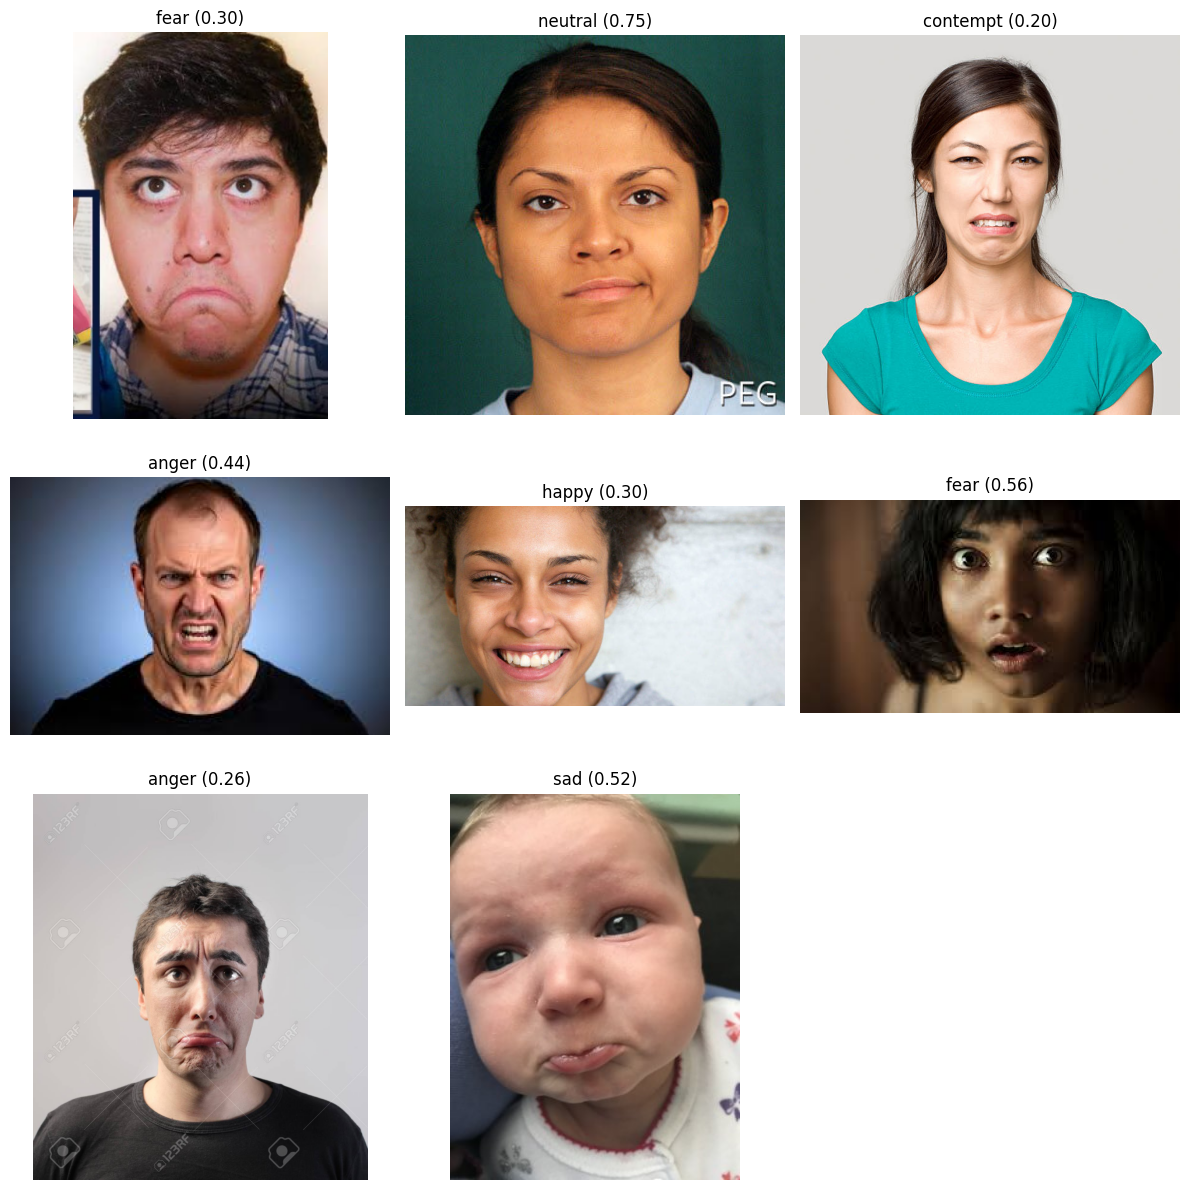

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files

# Load files
uploaded = files.upload()

images_data = {}

for filename in sorted(uploaded.keys()):
    # Read and process each image
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images_data[filename] = img_rgb

# Preprocess
images = []
image_filenames = list(images_data.keys())

for filename in image_filenames:
    img_rgb = images_data[filename]
    img_resized = cv2.resize(img_rgb, (48, 48))  # Redimensionar al tamaño de entrada
    img_normalized = img_resized / 255.0  # Normalization
    images.append(img_normalized)


images_array = np.array(images)
print(f"Forma del array procesado: {images_array.shape}")

# Predictions
predictions = model.predict(images_array)

# Labels mapping
class_mapping = {
    0: 'neutral',
    1: 'happy',
    2: 'sad',
    3: 'surprise',
    4: 'fear',
    5: 'disgust',
    6: 'anger',
    7: 'contempt'
}

# 3x3 Visualization
plt.figure(figsize=(12, 12))
rows, cols = 3, 3
max_images = rows * cols

for idx, (filename, prediction) in enumerate(zip(image_filenames, predictions)):
    if idx >= max_images:
        break
    predicted_class = np.argmax(prediction)
    predicted_label = class_mapping[predicted_class]
    confidence = prediction[predicted_class]

    plt.subplot(rows, cols, idx + 1)
    plt.imshow(images_data[filename])
    plt.title(f"{predicted_label} ({confidence:.2f})")
    plt.axis("off")

plt.tight_layout()
plt.show()